In [25]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.utils.data as Data
import torch.nn as nn

In [2]:
raw_data = np.array(pd.read_excel("weather.xlsx")).astype(np.float)

/tmp/ipykernel_284055/1734414067.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  raw_data = np.array(pd.read_excel("weather.xlsx")).astype(np.float)


In [9]:
X = np.array([i for i in range(raw_data.shape[0])]).reshape(-1,1)
y = raw_data[:,5]

In [4]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)

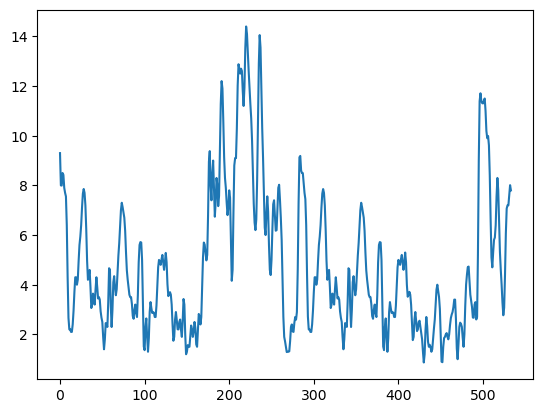

[ 9.29974862  8.00011172  7.99251581  8.49971202  8.42242255  7.89993742
  7.69965145  7.55495644  6.40045734  4.30014412  2.66328471  2.20047126
  2.2067363   2.10006406  2.09942812  2.39990531  2.95147862  3.70045109
  4.29970647  4.30009196  4.00087019  4.19950752  4.95607679  5.60028981
  5.93798477  6.39997904  7.10024855  7.667423    7.85564661  7.69990091
  7.20008758  6.23248387  4.97305131  4.19968783  4.37255238  4.59478705
  3.89986102  3.06213825  3.19994023  3.6410846   3.39963857  3.20041382
  3.81144576  4.29991234  3.900282    3.44549659  3.50127308  3.40007076
  2.92943536  2.67142489  2.50043276  1.89406066  1.40009681  1.80023343
  2.45445378  2.40035812  2.29974047  3.30046279  4.66458659  4.60011188
  3.1550459   2.29700513  3.00025187  4.09973316  4.34351511  3.90021244
  3.57677966  3.8174117   4.50008652  5.17163283  5.67768985  6.29989087
  6.9996413   7.30043628  7.12765678  6.89989161  6.70008862  6.16896358
  5.29974906  4.5766079   4.20013923  3.89962447  3

In [23]:
plt.plot(X,svr_rbf.fit(X, y).predict(X))
plt.show()
print(svr_rbf.fit(X, y).predict(X))

In [26]:
# 定义dataset
class my_Dataset(Data.Dataset):
    def __init__(self, features, labels):
        self.X = features
        self.y = labels

    def __getitem__(self, index):
        return self.X[index], self.y[index]

    def __len__(self):
        return self.X.shape[0]

class WindDataset:
    def __init__(self,predict_step=3,label=6):
        self.raw_data = np.array(pd.read_excel("weather.xlsx")).astype(np.float)
        # 数据标准化
        self.predict_step = predict_step
        self.label = label
        self.min = self.raw_data.min()
        self.max = self.raw_data.max()
        self.data = (self.raw_data - self.min) / (self.max - self.min)

    def denormalize(self, x):
        return x * (self.max - self.min) + self.min

    def construct_set(self, train_por=0.65,val_por=0.2,test_por=0.15, window_size=50):
        train_x = []
        train_y = []
        val_x = []
        val_y = []
        test_x = []
        test_y = []
        len_train = int(self.data.shape[0] * train_por)
        print("len_train",len_train)
        len_val = int(self.data.shape[0] * val_por)
        len_test = int(self.data.shape[0] * test_por)
        train_seqs = self.data[:len_train]
        val_seqs = self.data[len_train:len_val+len_train]
        test_seqs = self.data[len_train+len_val:len_val+len_train+len_test]

        for i in range(train_seqs.shape[0] - window_size+1-self.predict_step):
            train_x.append(train_seqs[i:i+window_size, :])
            train_y.append(train_seqs[i+window_size:i+window_size+self.predict_step,self.label])

        for i in range(val_seqs.shape[0] - window_size+1-self.predict_step):
            val_x.append(val_seqs[i:i+window_size, :])
            val_y.append(val_seqs[i+window_size:i+window_size+self.predict_step,self.label])

        for i in range(test_seqs.shape[0] - window_size+1-self.predict_step):
            test_x.append(test_seqs[i:i+window_size, :])
            test_y.append(test_seqs[i+window_size:i+window_size+self.predict_step,self.label])
        train_x = np.array(train_x).squeeze()
        train_y = np.array(train_y).squeeze()
        val_x = np.array(val_x).squeeze()
        val_y = np.array(val_y).squeeze()
        test_x = np.array(test_x).squeeze()
        test_y = np.array(test_y).squeeze()
        return [train_x,train_y,val_x,val_y,test_x,test_y]

In [27]:
WindData = WindDataset()
train_x,train_y,val_x,val_y,test_x,test_y = WindData.construct_set()

len_train 347


/tmp/ipykernel_284055/3214458604.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.raw_data = np.array(pd.read_excel("weather.xlsx")).astype(np.float)


In [28]:
plt.plot(X,svr_rbf.fit(train_x, train_y).predict(val_x))
plt.show()

ValueError: Found array with dim 3. Estimator expected <= 2.